### Import Library

In [1]:
import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

# /usr/bin/tesseract /usr/share/man/man1/tesseract.1.gz
#pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

### Opening an Image

(np.float64(-0.5), np.float64(741.5), np.float64(354.5), np.float64(-0.5))

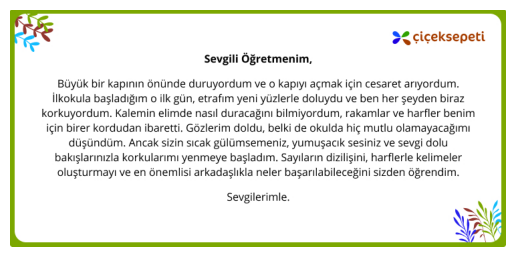

In [2]:
image_file = "1.jpg"
img = cv2.imread(image_file)
plt.imshow(img)
plt.axis('off')


In [3]:
def display_image(im_path):
    dpi=80
    im_data=Image.open(im_path)
    height, width=im_data.size

    figsize=width / float(dpi), height / float(dpi)
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0, 0, 1, 1])


    ax.axis('off')
    ax.imshow(im_data,cmap='gray')
    plt.show()
    

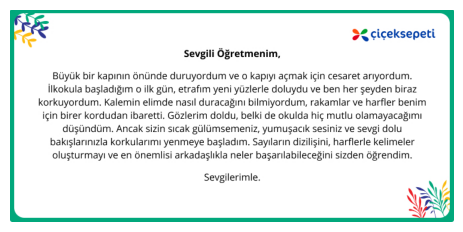

In [4]:
display_image(image_file)

### Inverted Image

In [5]:
inverted_image=cv2.bitwise_not(img)
cv2.imwrite("temp/inverted_image.jpg",inverted_image)

True

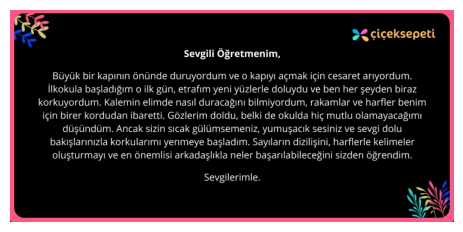

In [6]:
display_image("temp/inverted_image.jpg")

### Binarization

In [7]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
gray_image=grayscale(img)
cv2.imwrite("temp/gray_image.jpg",gray_image)


True

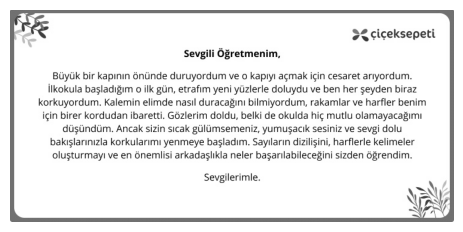

In [10]:
display_image("temp/gray_image.jpg")

In [11]:
thresh, im_bw = cv2.threshold(gray_image, 200,220, cv2.THRESH_BINARY)
cv2.imwrite("temp/binary_image.jpg",im_bw)

True

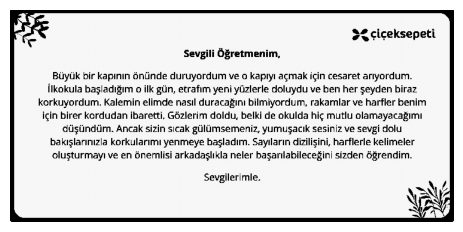

In [12]:
display_image("temp/binary_image.jpg")

### Noise Removal

In [13]:
def noise_removal(image):
    
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return image

In [14]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

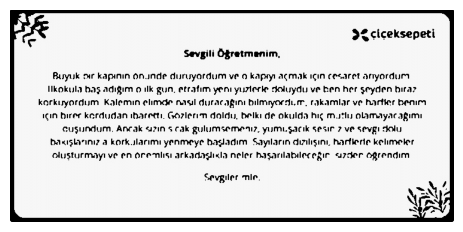

In [15]:
display_image("temp/no_noise.jpg")

### Dilation and Erosion

In [16]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image


In [17]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg",eroded_image)

True

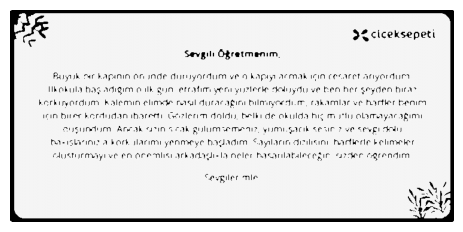

In [18]:
display_image("temp/eroded_image.jpg")

In [19]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image


In [20]:
dilated_image= thick_font(no_noise)
cv2.imwrite("temp/thick_image.jpg",dilated_image)

True

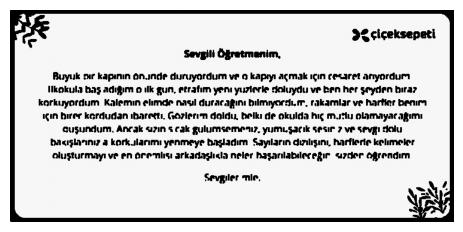

In [21]:
display_image("temp/thick_image.jpg")

(np.float64(-0.5), np.float64(863.5), np.float64(485.5), np.float64(-0.5))

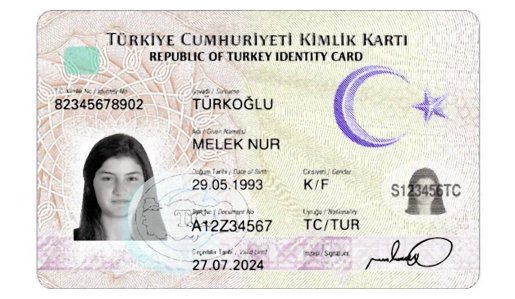

In [22]:

image= cv2.imread("kimlik.jpg")
image=cv2.medianBlur(image, 3)
plt.imshow(image)
plt.axis('off')